In [40]:
import numpy as np
import matplotlib.pyplot as plt

#vacuum permittivity
eps0 = 8.8542*10e-12

#vacuum permeability
mu0 = 1.2566*10e-6

#size of simulated domain in meters
x = 0.25
y = 0.1
z = 0.25

#size of single cell in meters, same for x, y and z
delta = 0.005

#end-time of simulation in seconds
tend = 0.000000005

#desired courant number, has to be lower than one
C = 0.1

#calculation of timestep from courant number
dt = C*delta*np.sqrt(eps0*mu0)

#calculation for constants used later on in update equations
a = dt/(eps0*mu0)

#calculation of number of timesteps and cells in x-, y- and z-direction
stepst = int(np.ceil(tend/dt))
stepsx = int(np.ceil(x/delta))
stepsy = int(np.ceil(y/delta))
stepsz = int(np.ceil(z/delta))

In [41]:
print("timestep: ", dt*1000000000, "ns")
print("timesteps: ", stepst)
print("spacial step: ", delta, "m")
print("steps in x-dir: ", stepsx)
print("steps in y-dir: ", stepsy)
print("steps in z-dir: ", stepsz)

timestep:  0.0166779702901762 ns
timesteps:  300
spacial step:  0.005 m
steps in x-dir:  50
steps in y-dir:  20
steps in z-dir:  50


In [42]:
#creation of arrays for storing current E-Fields
Ex = np.zeros((int(np.ceil(x/delta)) + 1, int(np.ceil(y/delta)) + 1, int(np.ceil(z/delta)) + 1))
Ey = np.zeros((int(np.ceil(x/delta)) + 1, int(np.ceil(y/delta)) + 1, int(np.ceil(z/delta)) + 1))
Ez = np.zeros((int(np.ceil(x/delta)) + 1, int(np.ceil(y/delta)) + 1, int(np.ceil(z/delta)) + 1))

#creation of arrays for storing current B-Fields
Bx = np.zeros((int(np.ceil(x/delta)) + 1, int(np.ceil(y/delta)) + 1, int(np.ceil(z/delta)) + 1))
By = np.zeros((int(np.ceil(x/delta)) + 1, int(np.ceil(y/delta)) + 1, int(np.ceil(z/delta)) + 1))
Bz = np.zeros((int(np.ceil(x/delta)) + 1, int(np.ceil(y/delta)) + 1, int(np.ceil(z/delta)) + 1))

In [43]:
#definition of partial derivatives of all B- and E-components

#returns Ex-derivative respective to y at (i+0.5)dx, (j+0.5)dy, kdz
def dEx_dy(i, j, k):
    return (Ex[i, j+1, k] - Ex[i, j, k])/delta

#returns Ex-derivative respective to z at (i+0.5)dx, jdy, (k+0.5)dz
def dEx_dz(i, j, k):
    return (Ex[i, j, k+1] - Ex[i, j, k])/delta

#returns Ey-derivative respective to x at (i+0.5)dx, (j+0.5)dy, kdz
def dEy_dx(i, j, k):
    return (Ey[i+1, j, k] - Ey[i, j, k])/delta

#returns Ey-derivative respective to z at idx, (j+0.5)dy, (k+0.5)dz
def dEy_dz(i, j, k):
    return (Ey[i, j, k+1] - Ey[i, j, k])/delta

#returns Ez-derivative respective to x at (i+0.5)dx, jdy, (k+0.5)dz
def dEz_dx(i, j, k):
    return (Ez[i+1, j, k] - Ez[i, j, k])/delta

#returns Ez-derivative respective to y at idx, (j+0.5)dy, (k+0.5)kdz
def dEz_dy(i, j, k):
    return (Ez[i, j+1, k] - Ez[i, j, k])/delta



#returns Bx-derivative respective to y at idx, jdy, (k+0.5)dz
def dBx_dy(i, j, k):
    return (Bx[i, j, k] - Bx[i, j-1, k])/delta

#returns Bx-derivative respective to z at idx, (j+0.5)dy, kdz
def dBx_dz(i, j, k):
    return (Bx[i, j, k] - Bx[i, j, k-1])/delta

#returns By-derivative respective to x at idx, jdy, (k+0.5)dz
def dBy_dx(i, j, k):
    return (By[i, j, k] - By[i-1, j, k])/delta

#returns By-derivative respective to z at (i+0.5)dx, jdy, kdz
def dBy_dz(i, j, k):
    return (By[i, j, k] - By[i, j, k-1])/delta

#returns Bz-derivative respective to x at idx, (j+0.5)dy, kdz
def dBz_dx(i, j, k):
    return (Bz[i, j, k] - Bz[i-1, j, k])/delta

#returns Bz-derivative respective to y at (i+0.5)dx, jdy, kdz
def dBz_dy(i, j, k):
    return (Bz[i, j, k] - Bz[i, j-1, k])/delta

In [44]:
#iterate main loop for every timestep
for t in range(stepst):
    
    #update E-fields; start at 1, 1, 1 as differential of B accesses entries before point of interest
    for i in range(stepsx-1):
        for j in range(stepsy-1):
            for k in range(stepsz-1):
                Ex[i+1, j+1, k+1] = Ex[i+1, j+1, k+1] + a*(dBy_dz(i+1, j+1, k+1) - dBz_dy(i+1, j+1, k+1))
                Ey[i+1, j+1, k+1] = Ey[i+1, j+1, k+1] + a*(dBz_dx(i+1, j+1, k+1) - dBx_dz(i+1, j+1, k+1))
                Ez[i+1, j+1, k+1] = Ez[i+1, j+1, k+1] + a*(dBx_dy(i+1, j+1, k+1) - dBy_dx(i+1, j+1, k+1))
    
    #Ey-sources at center of domain
    Ey[int(np.ceil(stepsx/2)), int(np.ceil(stepsy/2)), int(np.ceil(stepsz/2))] += 1*np.sin(2*np.pi*1000000000*dt*t)

    #update B-fields
    for i in range(stepsx-1):
        for j in range(stepsy-1):
            for k in range(stepsz-1):
                Bx[i, j, k] = Bx[i, j, k] - dt*(dEy_dz(i, j, k) - dEz_dy(i, j, k))
                By[i, j, k] = By[i, j, k] - dt*(dEz_dx(i, j, k) - dEx_dz(i, j, k))
                Bz[i, j, k] = Bz[i, j, k] - dt*(dEx_dy(i, j, k) - dEy_dx(i, j, k))
                
    print(np.floor(100*t/stepst), "%")

0.0 %
0.0 %
0.0 %
1.0 %
1.0 %
1.0 %
2.0 %
2.0 %
2.0 %
3.0 %
3.0 %
3.0 %
4.0 %
4.0 %
4.0 %
5.0 %
5.0 %
5.0 %
6.0 %
6.0 %
6.0 %
7.0 %
7.0 %
7.0 %
8.0 %
8.0 %
8.0 %
9.0 %
9.0 %
9.0 %
10.0 %
10.0 %
10.0 %
11.0 %
11.0 %
11.0 %
12.0 %
12.0 %
12.0 %
13.0 %
13.0 %
13.0 %
14.0 %
14.0 %
14.0 %
15.0 %
15.0 %
15.0 %
16.0 %
16.0 %
16.0 %
17.0 %
17.0 %
17.0 %
18.0 %
18.0 %
18.0 %
19.0 %
19.0 %
19.0 %
20.0 %
20.0 %
20.0 %
21.0 %
21.0 %
21.0 %
22.0 %
22.0 %
22.0 %
23.0 %
23.0 %
23.0 %
24.0 %
24.0 %
24.0 %
25.0 %
25.0 %
25.0 %
26.0 %
26.0 %
26.0 %
27.0 %
27.0 %
27.0 %
28.0 %
28.0 %
28.0 %
29.0 %
29.0 %
29.0 %
30.0 %
30.0 %
30.0 %
31.0 %
31.0 %
31.0 %
32.0 %
32.0 %
32.0 %
33.0 %
33.0 %
33.0 %
34.0 %
34.0 %
34.0 %
35.0 %
35.0 %
35.0 %
36.0 %
36.0 %
36.0 %
37.0 %
37.0 %
37.0 %
38.0 %
38.0 %
38.0 %
39.0 %
39.0 %
39.0 %
40.0 %
40.0 %
40.0 %
41.0 %
41.0 %
41.0 %
42.0 %
42.0 %
42.0 %
43.0 %
43.0 %
43.0 %
44.0 %
44.0 %
44.0 %
45.0 %
45.0 %
45.0 %
46.0 %
46.0 %
46.0 %
47.0 %
47.0 %
47.0 %
48.0 %
48.0 %
48.0 %
4

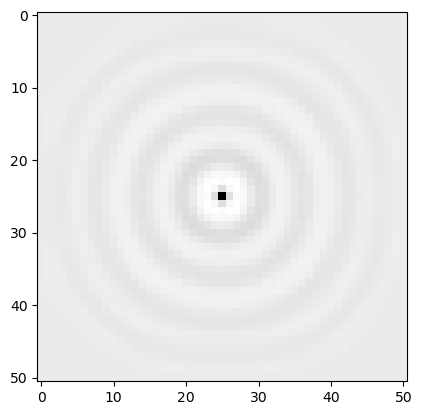

In [47]:
fig, ax = plt.subplots()
plot = ax.imshow(Ey[:,int(np.ceil(stepsy/2)),:], cmap='Greys')